<a href="https://colab.research.google.com/github/Attent1/CP2-IA/blob/main/c_pia_de_aaaaa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [20]:
url = "/content/drive/MyDrive/solicitacoescredito.csv"

In [21]:
# Carregar o arquivo CSV
dados = pd.read_csv(url)
colunas_para_media = ['margemBruta', 'faturamentoBruto', 'totalAtivo']

dados = dados.groupby('cnpjSemTraco')[colunas_para_media].mean().reset_index()

# Remover todas as colunas não numéricas
dados_numericos = dados.select_dtypes(include='number')
dados_numericos = dados_numericos.drop('margemBruta', axis=1)

df= dados_numericos.fillna(dados_numericos.mean())


In [ ]:
df.shape

(2829, 2)

In [30]:
import numpy as np

# Adicionando condições para classificar o porte de cada empresa
condicoes = [
    (dados_numericos['faturamentoBruto'] <= 966916.5),
    (dados_numericos['faturamentoBruto'] <= 10962770.0),
    (dados_numericos['faturamentoBruto'] <= 4590082142.857142)
]

opcoes = ['pequena', 'media', 'grande']

# Usando np.select() para atribuir valores com base nas condições
dados_numericos['porte'] = np.select(condicoes, opcoes, default='desconhecido')


In [31]:
dados_numericos.head()

,faturamentoBruto,totalAtivo,valorAprovado,porte
0,1.017393e+07,1.041153e+07,215000.000000,media
1,2.561542e+06,NaN,47500.000000,media
2,2.146509e+06,1.371206e+06,8000.000000,media
3,8.089218e+06,9.684003e+06,133333.333333,media
4,2.550429e+06,8.683270e+05,15000.000000,media


In [32]:
# Remover linhas com valores ausentes
dados = dados_numericos.dropna()

# Dividir os dados em features (X) e target (y)
X = dados.drop(columns=["porte"])
y = dados['porte']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar e treinar o modelo de Árvore de Decisão
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo.predict(X_test)

# Avaliar o modelo
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", acuracia)


Acurácia do modelo: 0.9965870307167235


In [24]:
dados_numericos.head()

,faturamentoBruto,totalAtivo,porte
0,1.017393e+07,1.041153e+07,media
1,2.561542e+06,NaN,media
2,2.146509e+06,1.371206e+06,media
3,8.089218e+06,9.684003e+06,media
4,2.550429e+06,8.683270e+05,media


In [25]:

input_manual = {
    'faturamentoBruto': [7000000],
    'totalAtivo': [500000]
}

input_df = pd.DataFrame(input_manual)

input_preprocessado = input_df.fillna(input_df.mean())

previsoes = modelo.predict(input_preprocessado)

print("Previsão para o input manual:", previsoes)


Previsão para o input manual: ['media']


In [26]:
url = "/content/drive/MyDrive/solicitacoescredito.csv"

In [27]:
# Carregar o arquivo CSV
dados = pd.read_csv(url)
colunas_para_media = ['margemBruta', 'faturamentoBruto', 'totalAtivo', 'valorAprovado' ]

dados = dados.groupby('cnpjSemTraco')[colunas_para_media].mean().reset_index()

# Remover todas as colunas não numéricas
dados_numericos = dados.select_dtypes(include='number')
dados_numericos = dados_numericos.drop('margemBruta', axis=1)

df= dados_numericos.fillna(dados_numericos.mean())


In [28]:
dados = df.dropna()


X = dados[['faturamentoBruto', 'totalAtivo', 'valorAprovado']]
y = dados['valorAprovado']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)


y_pred = modelo.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Erro médio quadrático do modelo:", mse)


Erro médio quadrático do modelo: 5.540008190746045e-13


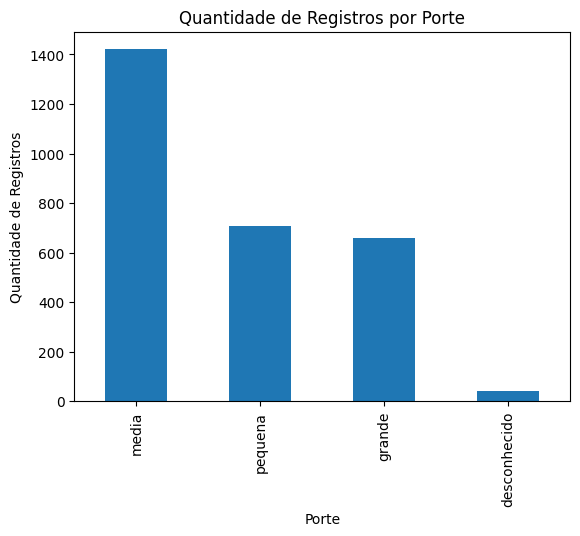

In [33]:
contagem_portes = dados_numericos['porte'].value_counts()

# Plotando o gráfico de barras
contagem_portes.plot(kind='bar')

# Adicionando título e rótulos aos eixos
plt.title('Quantidade de Registros por Porte')
plt.xlabel('Porte')
plt.ylabel('Quantidade de Registros')

# Exibindo o gráfico
plt.show()

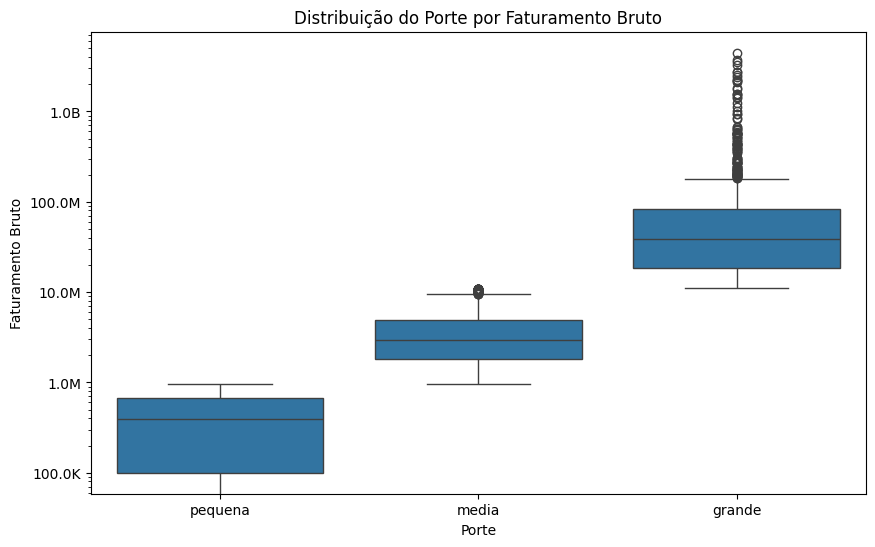

In [45]:
import matplotlib.ticker as ticker


# Criando o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='porte', y='faturamentoBruto', data=dados_numericos, order=['pequena', 'media', 'grande'])

# Adicionando título e rótulos aos eixos
plt.title('Distribuição do Porte por Faturamento Bruto')
plt.xlabel('Porte')
plt.ylabel('Faturamento Bruto')

# Ajustando a escala do eixo y para melhor visualização
plt.yscale('log')  # Usar escala logarítmica se houver grande disparidade nos valores

# Customizando os rótulos do eixo y para mostrar valores em uma unidade mais legível
def y_fmt(x, _):
    if x >= 1e9:
        return f'{x * 1e-9:.1f}B'
    elif x >= 1e6:
        return f'{x * 1e-6:.1f}M'
    elif x >= 1e3:
        return f'{x * 1e-3:.1f}K'
    else:
        return f'{x:.0f}'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))

# Exibindo o gráfico
plt.show()